# 一般化線形モデル

In [3]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

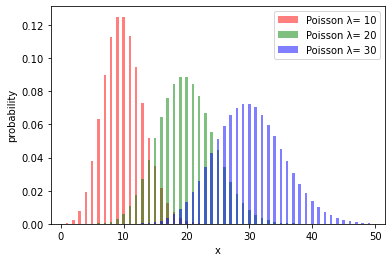

In [5]:
x = np.arange(1,50,1)
y1 = [poisson.pmf(i, 10) for i in x]
y2 = [poisson.pmf(i, 20) for i in x]
y3 = [poisson.pmf(i, 30) for i in x]

plt.bar(x, y1, align='center', width=0.4, color='red', alpha=0.5, label='Poisson λ= %d' % 10)
plt.bar(x, y2, align='center', width=0.4, color='green', alpha=0.5, label='Poisson λ= %d' % 20)
plt.bar(x, y3, align='center', width=0.4, color='blue', alpha=0.5, label='Poisson λ= %d' % 30)
plt.xlabel('x')
plt.ylabel('probability')
plt.legend()
plt.show()

ポワソン分布はパラメータλによって分布が変わることが確認できる。\
例えば、平均種子数λiが与えられると、植物個体iから取得できる種子数yiが従う確率分布を得ることができる

リンク関数を以下のように設定する。
$$\log\lambda_i=\beta_0+\beta_1x_i$$
これを変形すると$$\lambda_i=exp(\beta_0+\beta_1x_i)$$となる。\
植物の大きさxiとパラメータβiから平均種子数λiが得られ、大きさxiの植物個体が従うポワソン分布が求まる。

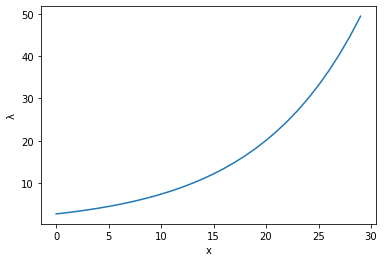

In [6]:
#平均種子数と体の大きさの関係を図示
x = np.arange(0,30,1)
beta_0 = 1
beta_1 = 0.1
lam = np.exp(beta_0 + beta_1*x)

plt.plot(x, lam)
plt.xlabel('x')
plt.ylabel('λ')
plt.show()

この曲線が、xiとyiのデータセットに対して引こうとしている曲線となる。\
未定なパラメータλに関しては最尤推定法によって推定する。

## PythonでGLMを実践

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.datasets import load_boston

In [8]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

#説明変数xと目的変数yを準備
boston_df['PRICE'] = boston.target
x = boston_df.drop('PRICE', axis=1)
y = boston_df['PRICE']

c:\Users\ayumi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<AxesSubplot:xlabel='PRICE', ylabel='RM'>

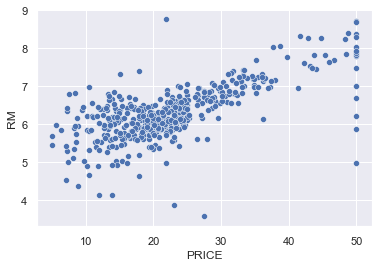

In [11]:
column = 'RM'
sns.scatterplot(x='PRICE', y=columns, data=boston_df[['PRICE', column]])

### モデリング

In [16]:
#説明変数と目的変数を一つの行列にする
data = boston_df

#線形予測子を定義
formula = 'PRICE ~ 1 + RM'

#リンク関数を定義
link = sm.genmod.families.links.log()
link_gauss = sm.genmod.families.links.identity()

#確率分布を定義
family = sm.families.Poisson(link=link)
family_gauss = sm.families.Gaussian(link=link_gauss)

#モデリング（ポワソン分布）
model = smf.glm(formula=formula, data=data, family=family)

#モデリング（正規分布）
model_gauss = smf.glm(formula=formula, data=data, family=family_gauss)

#推定
result = model.fit()
result_gauss = model_gauss.fit()


In [17]:
print('----モデリング結果----')
print()
print(result.summary())
print('----モデリング結果(model_gauss)----')
print()
print(result_gauss.summary())

----モデリング結果----

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  PRICE   No. Observations:                  506
Model:                            GLM   Df Residuals:                      504
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1689.2
Date:                Tue, 10 Jan 2023   Deviance:                       908.46
Time:                        23:36:56   Pearson chi2:                     939.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8229
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7139      0.081   

In [18]:
#AICの確認
print('AIC')
print(result.aic)
print()
print('AIC(model_gauss)')
print(result_gauss.aic)
print()

AIC
3382.3210451034556

AIC(model_gauss)
3350.151117225073



### 作成したモデルでプロット

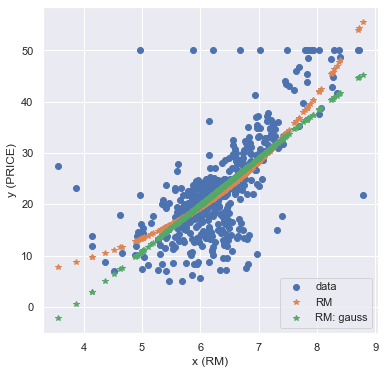

In [19]:
y_hat = result.predict(x)
y_hat_gauss = result_gauss.predict(x)

fig = plt.figure(figsize=(6.0,6.0))
plt.plot(x['RM'], y, 'o', label='data')
plt.plot(x['RM'], y_hat, '*', label='RM')
plt.plot(x['RM'], y_hat_gauss, '*', label='RM: gauss')
plt.xlabel('x (RM)'), plt.ylabel('y (PRICE)')
plt.legend()
plt.show()